# Scenario
บริษัท Cyclistic ต้องการออกแบบกลยุทธ์ทางการตลาดที่มุ่งเปลี่ยนผู้ขับขี่ทั่วไปให้เป็นสมาชิกรายปี เพื่อที่จะทำเช่นนั้นทีมนักวิเคราะห์การตลาดจำเป็นต้องเข้าใจให้ดียิ่งขึ้นว่าสมาชิกรายปีและผู้โดยสารทั่วไปแตกต่างกันอย่างไร เพราะเหตุใดผู้ขับขี่ทั่วไปจะซื้อสมาชิก และสื่อดิจิทัลจะส่งผลต่อกลยุทธ์ทางการตลาดของพวกเขาอย่างไร

# Ask
1.สมาชิกรายปีและนักปั่นทั่วไปใช้จักรยาน Cyclistic แตกต่างกันอย่างไร?

2.เหตุใดผู้ขับขี่ทั่วไปจึงซื้อสมาชิกรายปีแบบ Cyclistic

3.Cyclistic จะใช้สื่อดิจิทัลเพื่อโน้มน้าวผู้ขับขี่ทั่วไปให้เป็นสมาชิกได้อย่างไร

# Prepare
1.เช็คคุณภาพของข้อมูล

โดยข้อมูลที่นำมานั้นมาจากภายในบริษัทเองจึงเชื่อถือได้ ข้อมูลนั้นครอบคลุมรายละเอียดการเดินทาง วันเวลา ประเภทพาหนะ และประเภทสมาชิก และข้อมูลมีการอัพเดททุกเดือน ข้อมูลไม่มีการ bias เพราะได้ลบข้อมูลที่พนักงานบริษัทใช้งานเองออกหมดแล้ว นอกจากนี้จำนวนข้อมูลนั้นเพียงพอในการวิเคราะห์เพราะเป็นข้อมูลทั้งpopulationของผู้ขับขี่ทั้งหมดที่ใช้บริการCyclistic

2.licence and privacy

data นี้เป็น public data ของบริษัทสมมติ Cyclistic ดูข้อมูลได้ที่  [Divvy](https://divvy-tripdata.s3.amazonaws.com/index.html) ถูกจัดทำภายใต้ [licenceนี้](https://ride.divvybikes.com/data-license-agreement) และไม่เปิดเผยข้อมูลส่วนบุคคลของผู้ขับขี่ ทำให้เราไม่มีสามารถวิเคราะห์ที่อยู่อาศัยของผู้ขับขี่กับตำแหน่งสถานีเช่าจักรยานได้

# Process
### import data

In [1]:
# Python 3 environment 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


# สร้าง List เพื่อเก็บข้อมูล DataFrame ที่อ่านจากไฟล์ทั้งหมด
all_data = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        df = pd.read_csv(os.path.join(dirname, filename))
        print('บันทึก',os.path.join(dirname, filename))
        all_data.append(df)

# รวมข้อมูลจาก DataFrame ที่อยู่ใน all_data เป็น DataFrame เดียว
trip_data = pd.concat(all_data)

# พิมพ์ range index ของ DataFrame
print("จำนวน index =",len(trip_data.index))

บันทึก /kaggle/input/divvy-tripdata/202202-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202212-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202208-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202203-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202205-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202206-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202301-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202211-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202201-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202209-divvy-publictripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202204-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202210-divvy-tripdata.csv
บันทึก /kaggle/input/divvy-tripdata/202207-divvy-tripdata.csv
จำนวน index = 5858018


### data skiming 
ดูข้อมูลในตารางคร่าวๆว่ามีรูปแบบอย่างไรบ้าง เพื่อที่เราจะได้จัดการเปลี่ยน data type ให้เข้ากับข้อมูลเทำให้สะดวกขึ้นในการวิเคราะห์ข้อมูล

In [2]:
# ดูแค่5rowแรก

trip_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member


### data type
ทำการเช็ค data type ที่เป็นอยู่

In [3]:
#ดู data type
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858018 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 625.7+ MB


* พบ column ที่ต้องแก้ data type คือ started_at กับ  ended_at เป็น datetime

### change data type to datetime
ทำการเปลี่ยน data typeและ ดูsummaryคร่าวๆ

In [4]:
#เปลี่ยน data type จาก object เป็น datetime
trip_data['started_at'] = pd.to_datetime(trip_data['started_at'])
trip_data['ended_at'] = pd.to_datetime(trip_data['ended_at'])
trip_data.describe(datetime_is_numeric=True)


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,5858018,5858018,5.858018e+06,5.858018e+06,5.852033e+06,5.852033e+06
mean,2022-07-26 02:58:23.248800768,2022-07-26 03:17:37.288804608,4.190205e+01,-8.764780e+01,4.190225e+01,-8.764788e+01
min,2022-01-01 00:00:05,2022-01-01 00:01:48,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,2022-05-30 12:12:21.249999872,2022-05-30 12:41:08.249999872,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766241e+01
50%,2022-07-25 21:18:11,2022-07-25 21:40:04,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,2022-09-21 18:34:03,2022-09-21 18:50:42.750000128,4.193000e+01,-8.762960e+01,4.193000e+01,-8.762963e+01
max,2023-01-31 23:56:09,2023-02-04 04:27:03,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00
std,NaN,NaN,4.636737e-02,2.995121e-02,6.753526e-02,1.066483e-01


กรณีที่1 วันเวลาผิดปกติ

เพราะเราดึงข้อมูลมาของเดือน1 ปี2022 ถึงเดือน 1 ปี2023 แสดงว่าเช่าช้าสุดคือตอนเที่ยงคืนของวันที่31เดือน1  ดังนั้น

* started_at ที่ควรเป็น min ไม่ควรต่ำกว่า 2022-01-01 00:00:00 max ไม่ควรมากกว่า 2023-01-31 24:00:00

* ended_at   ที่ควรเป็น min ไม่ควรต่ำกว่า 2022-01-01 00:00:00  

จาก output ไม่พบข้อมูลไหนผิดจากที่ควรเป็น

กรณีที่2 start > end

ต้องทำการลบ row ที่วันเวลา end น้อยกว่า start เนื่องจากวันคืนจักรยานต้องเกิดหลังเช่าเสมอ

### delete row that ended_at  < started_at

In [5]:
# สร้างคอลัมน์ 'filters' เพื่อเก็บผลลัพธ์ของเงื่อนไข
trip_data['filters'] = trip_data['ended_at']-trip_data['started_at']  < pd.Timedelta("0 days 00:00:00")

# กรองแถวที่ต้องการให้หายไป
trip_data = trip_data[~trip_data['filters']]

# ลบคอลัมน์ 'filters' เนื่องจากไม่ต้องการใช้งานแล้ว
trip_data.drop(columns=['filters'], inplace=True)

# datetime_is_numeric=True
# trip_data.describe(include=['datetime64'])
trip_data.describe(datetime_is_numeric=True)

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,5857918,5857918,5.857918e+06,5.857918e+06,5.851933e+06,5.851933e+06
mean,2022-07-26 02:57:17.377976064,2022-07-26 03:16:31.572444160,4.190205e+01,-8.764780e+01,4.190225e+01,-8.764788e+01
min,2022-01-01 00:00:05,2022-01-01 00:01:48,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,2022-05-30 12:11:53,2022-05-30 12:40:32,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766241e+01
50%,2022-07-25 21:16:40.500000,2022-07-25 21:37:52,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,2022-09-21 18:33:25.750000128,2022-09-21 18:50:10.750000128,4.193000e+01,-8.762960e+01,4.193000e+01,-8.762963e+01
max,2023-01-31 23:56:09,2023-02-04 04:27:03,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00
std,NaN,NaN,4.636749e-02,2.995119e-02,6.753560e-02,1.066492e-01


In [6]:
# ดูจำนวน index ที่เหลือ
print("จำนวน index หลังลบ row ที่ ended_at < started_at",len(trip_data.index))

จำนวน index หลังลบ row ที่ ended_at < started_at 5857918


### summary of numeric columns
 ดูsummaryคร่าวๆของcolumnที่เป็นตัวเลข

In [7]:
# ดูsummary ของ column ที่เป็น float
trip_data.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.857918e+06,5.857918e+06,5.851933e+06,5.851933e+06
mean,4.190205e+01,-8.764780e+01,4.190225e+01,-8.764788e+01
std,4.636749e-02,2.995119e-02,6.753560e-02,1.066492e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766241e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762960e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


พบว่า 
* ละติจูดและลองติจูดของ end มีค่าแปลกแยกคือ 0 ต้องลบrowนั้นทิ้ง เพราะสถานที่ให้บริการจักรยานนี้อยู่ในเมืองChicagoเมืองเดียว

ค่า lat ควรอยู่ที่ประมาณ 41 long ที่ประมาณ -87

ต้องหาค่าพิกัดที่แปลกแยกไป


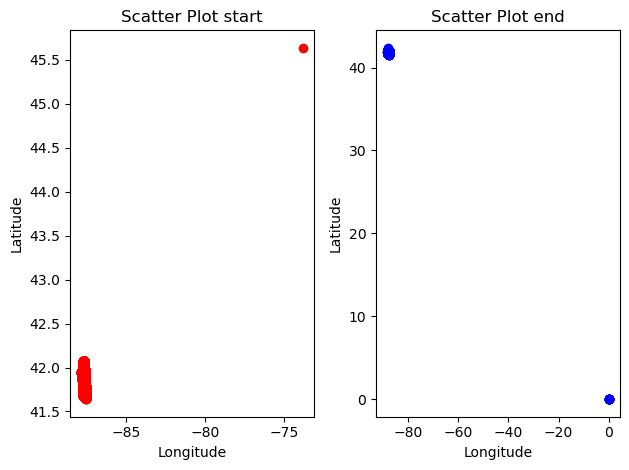

In [8]:
# สร้าง subplot สำหรับกราฟของจุดเริ่มต้น
plt.subplot(1, 2, 1)  # subplot ที่ 1 (1 row, 2 columns, ตำแหน่งที่ 1)
plt.scatter(trip_data['start_lng'], trip_data['start_lat'], c='red', label='Start')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot start')

# สร้าง subplot สำหรับกราฟของจุดสิ้นสุด
plt.subplot(1, 2, 2)  # subplot ที่ 2 (1 row, 2 columns, ตำแหน่งที่ 2)
plt.scatter(trip_data['end_lng'], trip_data['end_lat'], c='blue', label='End')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot end')

# แสดงกราฟทั้งหมด
plt.tight_layout()  
# ปรับให้กราฟไม่ทับกัน
plt.show()

พบว่า 
พิกัดที่แปลกแยก start เริ่มที่ประมาณ (-75,45.5)
พิกัดที่แปลกแยก end เริ่มที่ประมาณ (0,0)

In [9]:
#ลบ row ที่พิกัดแปลกแยก end
rows_to_drop = trip_data[(trip_data['end_lat'] < 40 ) & (trip_data['end_lng'] > -80)].index

# ลบแถวที่เลือกออกจาก DataFrame
trip_data = trip_data.drop(rows_to_drop)

#ลบ row ที่พิกัดแปลกแยก start
rows_to_drop = trip_data[(trip_data['start_lat'] > 45.5 ) & (trip_data['start_lng'] > -75)].index

# ลบแถวที่เลือกออกจาก DataFrame
trip_data = trip_data.drop(rows_to_drop)

# ดูจำนวน index ที่เหลือ
print("จำนวน index หลังลบ row ที่ มีพิกัดแปลกแยก",len(trip_data.index))

จำนวน index หลังลบ row ที่ มีพิกัดแปลกแยก 5857821


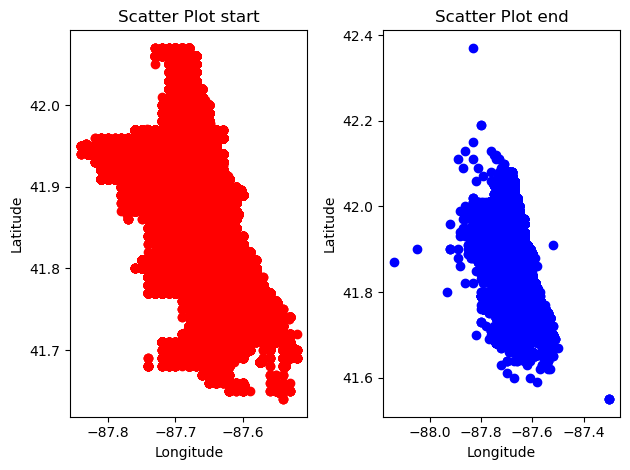

In [10]:
# สร้าง subplot สำหรับกราฟของจุดเริ่มต้น
plt.subplot(1, 2, 1)  # subplot ที่ 1 (1 row, 2 columns, ตำแหน่งที่ 1)
plt.scatter(trip_data['start_lng'], trip_data['start_lat'], c='red', label='Start')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot start')

# สร้าง subplot สำหรับกราฟของจุดสิ้นสุด
plt.subplot(1, 2, 2)  # subplot ที่ 2 (1 row, 2 columns, ตำแหน่งที่ 2)
plt.scatter(trip_data['end_lng'], trip_data['end_lat'], c='blue', label='End')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot end')

# แสดงกราฟทั้งหมด
plt.tight_layout()  
# ปรับให้กราฟไม่ทับกัน
plt.show()

### object column
 ดูsummaryคร่าวๆของcolumnที่เป็นตัวอักษร

In [11]:
# ดูsummary ของ column ที่เป็น object
trip_data.describe(include=['object'])

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,5857821,5857821,4998075,4998075,4937269,4937269,5857821
unique,5857821,3,1680,1312,1698,1317,2
top,E1E065E7ED285C02,electric_bike,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member
freq,1,2987181,75758,75758,75902,75902,3495877


In [12]:
# ตรวจสอบว่า rideable_type กับ member_casual มีอะไรบ้าง
unique_rideable_type = trip_data['rideable_type'].unique()
unique_member_casual = trip_data['member_casual'].unique()
print('rideable_typeมี',unique_rideable_type,'member_casual มี',unique_member_casual)

rideable_typeมี ['classic_bike' 'electric_bike' 'docked_bike'] member_casual มี ['member' 'casual']


พบว่า

* ride_id เป็นprimary key ไม่พบ duplicated data 

* rideable_type มี3แบบ 'classic_bike' 'electric_bike' 'docked_bike'

* member_casual มี2แบบ 'member' 'casual'

* มี null value ใน column ดังต่อไปนี้

-start_station_name และ start_station_id มีnullเท่ากันแสดงว่า nullเป็นคู่ๆกัน

-end_station_name และ end_station_id มีnullเท่ากันแสดงว่า nullเป็นคู่ๆกัน

ต้องทำการลบ null row ออกเพราะเราไม่สามารถinsertค่าเองได้เพราะ name กับ id หายไปพร้อมกัน


### delete null row of start_station_name and end_station_name 


In [13]:
# ลบ row ที่ไม่มี start_station_name 
trip_data.dropna(subset=['start_station_name'],inplace=True)

# ลบ row ที่ไม่มี end_station_name 
trip_data.dropna(subset=['end_station_name'],inplace=True)

# แสดงinfo
trip_data.describe(include=['object'])

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,4517496,4517496,4517496,4517496,4517496,4517496,4517496
unique,4517496,3,1563,1270,1603,1281,2
top,E1E065E7ED285C02,classic_bike,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member
freq,1,2687571,71775,71775,73047,73047,2729759


### check null values

In [15]:
#ตรวจเช็คว่าไม่มี columnไหนมีnull values อีก
#เช็คคอลัมน์ทั้งหมดใน DataFrame ที่มีค่า null values
columns_with_null_values = trip_data.columns[trip_data.isnull().any()]

if len(columns_with_null_values) > 0:
    print("คอลัมน์ที่มีค่า null values คือ:")
    print(columns_with_null_values)
else:
    print("ไม่มีคอลัมน์ใดที่มีค่า null values")

ไม่มีคอลัมน์ใดที่มีค่า null values


### สร้าง column ระยะเวลาจาก start ไป end

In [16]:
# สร้าง column คำนวณระยะเวลาจาก start ไป end
trip_data['ride_length']=trip_data['ended_at']-trip_data['started_at'] 

# output format ที่ได้เป็น 0day 00:00:00 ทำการเปลี่ยนเป็น numerical หน่วยนาที
trip_data['ride_length_minute'] = pd.to_timedelta(trip_data['ride_length']).dt.total_seconds() / 60

# แปลงเป็นทศนิยม 2หลัก
trip_data['ride_length_minute'] = trip_data['ride_length_minute'].round(2)

trip_data['ride_length_minute'].head()

0    15.25
1     4.43
2    13.63
3     6.95
4     2.90
Name: ride_length_minute, dtype: float64

### สร้าง column ระยะทาง

In [17]:
# สร้าง column ระยะทาง
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(pd.np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = pd.np.sin(dlat/2)**2 + pd.np.cos(lat1) * pd.np.cos(lat2) * pd.np.sin(dlon/2)**2
    c = 2 * pd.np.arcsin(pd.np.sqrt(a))
    r = 6371  # Earth's radius in kilometers (use 3956 for miles)

    # Calculate the distance
    distance = r * c
    return distance

# ใช้ function haversine_distance แล้วนำผลลัพท์ใส่column 'distance(km)'
trip_data['distance(km)'] = haversine_distance(trip_data['start_lat'], trip_data['start_lng'], trip_data['end_lat'], trip_data['end_lng'])

trip_data['distance(km)'].describe()

/tmp/ipykernel_32/1408807271.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lat1, lon1, lat2, lon2 = map(pd.np.radians, [lat1, lon1, lat2, lon2])
/tmp/ipykernel_32/1408807271.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  a = pd.np.sin(dlat/2)**2 + pd.np.cos(lat1) * pd.np.cos(lat2) * pd.np.sin(dlon/2)**2
/tmp/ipykernel_32/1408807271.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  c = 2 * pd.np.arcsin(pd.np.sqrt(a))


count    4.517496e+06
mean     2.074876e+00
std      1.855810e+00
min      0.000000e+00
25%      8.734636e-01
50%      1.552231e+00
75%      2.716327e+00
max      3.031546e+01
Name: distance(km), dtype: float64

### สร้างcolumn วัน

In [18]:
# สร้าง column วันที่เช่า
trip_data['day_of_week']= trip_data['started_at'].dt.weekday
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
trip_data['day_of_week'] = trip_data['day_of_week'].map(weekday_map)

trip_data['day_of_week'].head()

0     Saturday
1       Sunday
2       Friday
3       Monday
4    Wednesday
Name: day_of_week, dtype: object

### ทำการกรองค่าผิดปกติ

กรณีที่ 1.สำหรับผู้ขับขี่ทั่วไปหรือ casual ระยะเวลาของการเช่ามากสุดคือ 24 ชั่วโมงหากมากกว่านี้อาจเป็นการที่จักรยานถูกขโมย หาย หรือพัง ทำให้เราต้องกรองค่า  ride_length_minute > 1440 และเป็น casual

กรณที่ 2.ระยะเวลาเช่าที่ผู้ใช้งานเกิดการขัดข้องเช่น ระบบเกิด error ต้องกดยกเลิกก่อนแล้วเช่าใหม่ แต่ก็จะมีกรณีผู้ใช้งานปั่นจักรยานวน distance จึงไม่เกิน 0.015 km เช่นกัน ทำให้เรากรองค่า max ride_length_minute ที่ distance = 0.015 ไม่ได้ ดังนั้นเราจะหา ที่25% ของ ride_length_minute ที่ distance ไม่เกิน 0.015 km แทน ให้โอกาสเกิด error มากสุดเป็น1ใน4ของเหตุกาณ์ (gps โดยทั่วไปคลาดเคลื่อนประมาณ 15 เมตร) 

กรณีเหล่านี้อยู่นอกเหนือการใช้งานจักรยานตามปกติ ดังนั้นเราจึงสามารถพิจารณาว่ากรณีเหล่านี้ไม่ถูกต้องสำหรับการวิเคราะห์ของเรา จึงทำการกรองค่าผิดปกติเหล่านี้





In [19]:
# กรณีที่ 1

# สร้างคอลัมน์ 'filters' เพื่อเก็บผลลัพธ์ของเงื่อนไข ride_length_minute > 1440 และเป็น casual
filtered_data = trip_data[(trip_data['ride_length_minute'] > 1440)&(trip_data['member_casual'] == 'casual')]

# กรองแถวที่ต้องการให้หายไป
trip_data = trip_data.drop(filtered_data.index)

trip_data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_minute,distance(km)
count,4.516320e+06,4.516320e+06,4.516320e+06,4.516320e+06,4516320,4.516320e+06,4.516320e+06
mean,4.190183e+01,-8.764483e+01,4.190213e+01,-8.764509e+01,0 days 00:16:47.070530653,1.678451e+01,2.074838e+00
std,4.264248e-02,2.491689e-02,4.282255e-02,2.510891e-02,0 days 00:30:52.643194816,3.087739e+01,1.855669e+00
min,4.164850e+01,-8.783332e+01,4.164850e+01,-8.783000e+01,0 days 00:00:00,0.000000e+00,0.000000e+00
25%,4.188103e+01,-8.765814e+01,4.188103e+01,-8.765840e+01,0 days 00:05:58,5.970000e+00,8.734636e-01
50%,4.189679e+01,-8.764182e+01,4.189745e+01,-8.764275e+01,0 days 00:10:28,1.047000e+01,1.552232e+00
75%,4.192871e+01,-8.762858e+01,4.192883e+01,-8.762858e+01,0 days 00:18:46,1.877000e+01,2.716314e+00
max,4.206487e+01,-8.752531e+01,4.206485e+01,-8.752823e+01,1 days 00:57:52,1.497870e+03,3.031546e+01


In [20]:
# กรณีที่2 

# กรองค่าที่น้อยกว่า 0.015 km

filtered_data = trip_data[trip_data['distance(km)'] <= 0.015]

# นำค่าที่กรองมาหาค่าที่ 25% 
filtered_data = trip_data[trip_data['ride_length_minute'] < filtered_data['ride_length_minute'].quantile(0.25)]

# กรองแถวที่ต้องการให้หายไป
trip_data = trip_data.drop(filtered_data.index)

# show
trip_data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_minute,distance(km)
count,3.945639e+06,3.945639e+06,3.945639e+06,3.945639e+06,3945639,3.945639e+06,3.945639e+06
mean,4.190194e+01,-8.764473e+01,4.190225e+01,-8.764500e+01,0 days 00:17:09.593818643,1.715990e+01,2.117984e+00
std,4.252641e-02,2.477879e-02,4.270250e-02,2.497822e-02,0 days 00:31:05.144008269,3.108573e+01,1.855136e+00
min,4.164850e+01,-8.783332e+01,4.164850e+01,-8.783000e+01,0 days 00:01:01,1.020000e+00,0.000000e+00
25%,4.188103e+01,-8.765804e+01,4.188103e+01,-8.765840e+01,0 days 00:06:13,6.220000e+00,9.104702e-01
50%,4.189687e+01,-8.764175e+01,4.189766e+01,-8.764275e+01,0 days 00:10:43,1.072000e+01,1.585792e+00
75%,4.192876e+01,-8.762858e+01,4.192883e+01,-8.762858e+01,0 days 00:19:07,1.912000e+01,2.757566e+00
max,4.206486e+01,-8.752823e+01,4.206485e+01,-8.752823e+01,1 days 00:57:52,1.497870e+03,2.968522e+01


ทำการเช็คride length ของทั้ง member กับ casual 

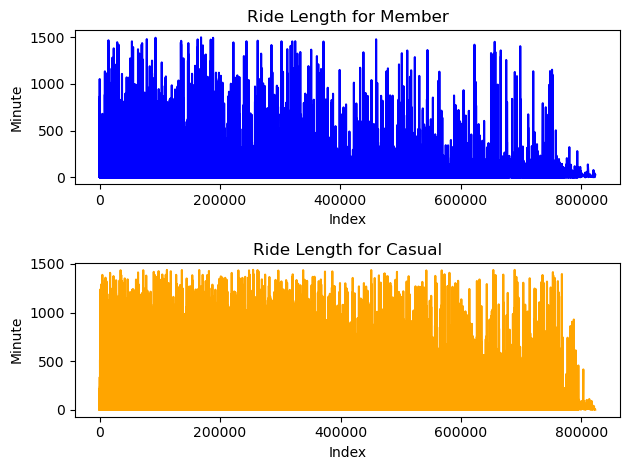

In [21]:
import matplotlib.pyplot as plt

# แยกข้อมูลสำหรับ member และ casual
casual_data = trip_data[trip_data['member_casual'] == 'casual']
member_data = trip_data[trip_data['member_casual'] == 'member']

# สร้าง subplot ขนาด 2x1 และเลือก subplot ที่ 1
plt.subplot(2, 1, 1)

# พล็อตกราฟสำหรับ member
plt.plot(member_data.index, member_data['ride_length_minute'], label='member', color='blue')

# กำหนดรายละเอียดของกราฟสำหรับ member
plt.title('Ride Length for Member')
plt.xlabel('Index')
plt.ylabel('Minute')

# เลือก subplot ที่ 2
plt.subplot(2, 1, 2)

# พล็อตกราฟสำหรับ casual
plt.plot(casual_data.index, casual_data['ride_length_minute'], label='casual', color='orange')

# กำหนดรายละเอียดของกราฟสำหรับ casual
plt.title('Ride Length for Casual')
plt.xlabel('Index')
plt.ylabel('Minute')

# ปรับขนาดกราฟแต่ละตัวให้ไม่ซ้อนทับกัน
plt.tight_layout()

# แสดงกราฟ
plt.show()

ไม่มี casual ที่เช่าเกิน 24 ชั่วโมงแล้ว

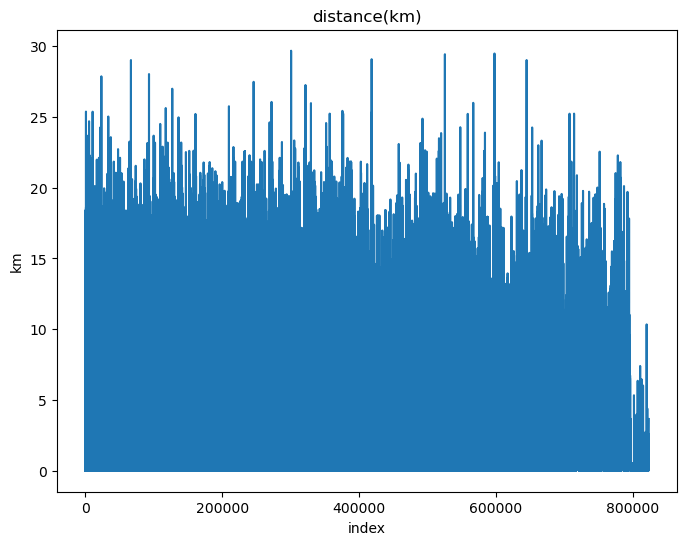

In [22]:
import matplotlib.pyplot as plt

# พล็อตกราฟแสดงระยะทาง
plt.figure(figsize=(8, 6))  # กำหนดขนาดของกราฟ

# ใช้คำสั่ง plot เพื่อพล็อตข้อมูลในคอลัมน์ 'distance(km)'
plt.plot(trip_data['distance(km)'])

# กำหนดรายละเอียดของกราฟ
plt.title('distance(km)')
plt.xlabel('index')
plt.ylabel('km')

# แสดงกราฟ
plt.show()


# Analyse

เราจะ export ข้อมูลไปที่ Tableau เนื่องจาก Tableau มีคุณเครื่องมือในการ visualize ที่สวยงามและสะดวกรวดเร็วทำให้วิเคราะห์ข้อมูลได้ง่ายขึ้น

แต่ก่อนที่เราจะ export file ได้เราต้องทำการแบ่งไฟล์ก่อน เนื่องจาก tableau นั้นอัพไฟล์ได้ทีละ1GBเท่านั้น

In [ ]:
# ตรวจสอบขนาดของ DataFrame 
print(trip_data.memory_usage().sum() / (1024 * 1024), 'MB')

#จากประสบการณ์ dataframe ขนาดประมาณ 500 MB เมื่อแปลงเป็นไฟล์ csvแล้วจะกลายเป็น 1 GB ดังนั้นควรแบ่ง

In [ ]:
# reset indexใหม่ 
trip_data = trip_data.reset_index(drop=True)

# หาลำดับที่ครึ่งนึง
half_length = len(trip_data)//2

# แบ่ง DataFrame เป็นสองส่วน 
trip_data_1, trip_data_2 = trip_data.iloc[:half_length], trip_data.iloc[half_length:]

print('file_1',trip_data_1.memory_usage().sum() / (1024 * 1024), 'MB')
print('file_2',trip_data_2.memory_usage().sum() / (1024 * 1024), 'MB')

# บันทึก DataFrame ที่แบ่งออกเป็นไฟล์ CSV
trip_data_1.to_csv('trip_data_1.csv', index=False)
print('Create files1 finish')
trip_data_2.to_csv('trip_data_2.csv', index=False)
print('Create files2 finish')


link Tableau
https://public.tableau.com/app/profile/manassanan.chantaratin/viz/bike_2_16906294601220/Story1

หรือ PDF file
https://github.com/manew-c/Cyclistic_bike_share_analysis/files/12454276/Cyclistic_bike_share_analysis.2.pdf

หรือกลับไปที่ GitHub
https://github.com/manew-c/Cyclistic_bike_share_analysis